In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

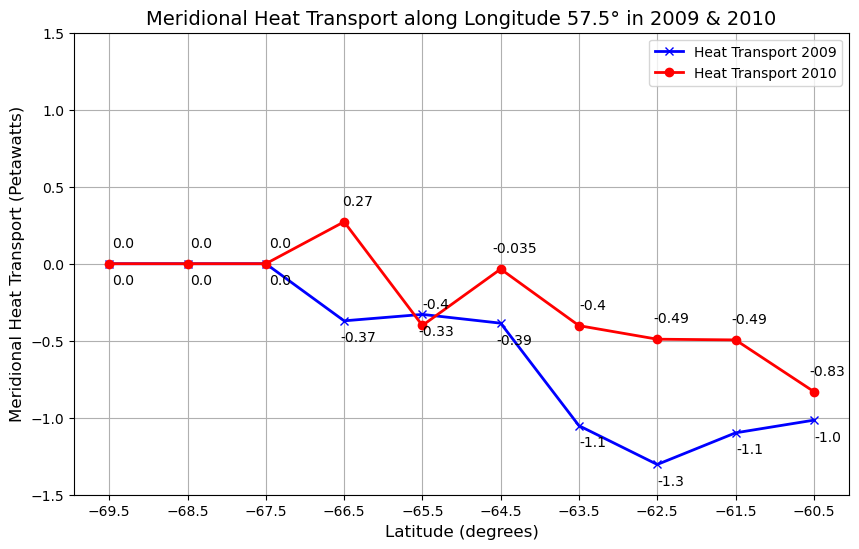

In [6]:
# Open the netCDF file as a Dataset object
ds = xr.open_dataset('/home/NCAOR/soumya/Data/MOMSIS_1991_2021_temp.nc').rename({'YT_OCEAN13_44': 'latitude', 'XT_OCEAN101_180': 'longitude', 'ST_OCEAN': 'LEV', 'TIME': 'time'})

# Select the data along a single longitude and keep the x-dimension
ds_lon = ds.sel(latitude=slice(-70, -60), longitude=57.5, time=slice('2009-02-01', '2009-02-28'), drop=False)

# Open the velocity NetCDF file and rename coordinates
df = xr.open_dataset('/home/NCAOR/soumya/Data/MOMSIS_1991_2021_v.nc').rename({'YU_OCEAN13_44': 'latitude', 'XU_OCEAN101_180': 'longitude', 'ST_OCEAN': 'LEV', 'TIME': 'time'})

# Select the desired latitude, longitude, and time range and keep the x-dimension
df = df.sel(latitude=slice(-70, -60), longitude=57.5, time=slice('2009-02-01', '2009-02-28'), drop=False)

# Extract or calculate the variables needed for heat transport
rho = 1025 # Density (kg/m3)
cp = 4218 # Specific heat capacity (J/kg/K)
dx = 25000 # Distance between grid points in x-direction (m)
depth = ds_lon['LEV'] # Depth levels (m)
dz = np.diff(depth) # Thickness of each depth level (m)
scaling_factor = 1e-16
T = ds_lon['TEMP'] # Temperature (C)
v = df['V'] # Meridional current velocity in y-direction (m/s)

# Calculate the area in z-direction (m2)
Az = dx * dz

# Convert Az to a xarray DataArray object with the dimension name 'z'
Az = xr.DataArray(Az, dims='z')

# Broadcast Az to have the same shape as T along the depth dimension
Az, _ = xr.broadcast(Az, T)

# Calculate the heat transport in y-direction (W)
Qy = rho * cp * T * v * Az

# Sum over all grid points in x-direction and z-direction to get the heat transport in y-direction at each latitude (W)
Qy_lat = Qy.sum(dim=['z','time','LEV'])
Qy_lat = Qy_lat * scaling_factor

# Open the netCDF file as a Dataset object
ds1 = xr.open_dataset('/home/NCAOR/soumya/Data/MOMSIS_1991_2021_temp.nc').rename({'YT_OCEAN13_44': 'latitude', 'XT_OCEAN101_180': 'longitude', 'ST_OCEAN': 'LEV', 'TIME': 'time'})

# Select the data along a single longitude and keep the x-dimension
ds_lon1 = ds.sel(latitude=slice(-70, -60), longitude=57.5, time=slice('2010-02-01', '2010-02-28'), drop=False)

# Open the velocity NetCDF file and rename coordinates
df1 = xr.open_dataset('/home/NCAOR/soumya/Data/MOMSIS_1991_2021_v.nc').rename({'YU_OCEAN13_44': 'latitude', 'XU_OCEAN101_180': 'longitude', 'ST_OCEAN': 'LEV', 'TIME': 'time'})

# Select the desired latitude, longitude, and time range and keep the x-dimension
df1 = df1.sel(latitude=slice(-70, -60), longitude=57.5, time=slice('2010-02-01', '2010-02-28'), drop=False)


T1 = ds_lon1['TEMP'] # Temperature (C)
v1 = df1['V'] # Meridional current velocity in y-direction (m/s)

# Calculate the area in z-direction (m2)
Az = dx * dz

# Convert Az to a xarray DataArray object with the dimension name 'z'
Az = xr.DataArray(Az, dims='z')

# Broadcast Az to have the same shape as T along the depth dimension
Az, _ = xr.broadcast(Az, T1)

# Calculate the heat transport in y-direction (W)
Qy1 = rho * cp * T1 * v1 * Az

# Sum over all grid points in x-direction and z-direction to get the heat transport in y-direction at each latitude (W)
Qy_lat1 = Qy1.sum(dim=['z','time','LEV'])
Qy_lat1 = Qy_lat1 * scaling_factor

# Set a custom color palette
sns.set_palette("Set2")

# Plot Qy_lat1 vs latitude with customized aesthetics
fig, ax = plt.subplots(figsize=(10, 6))
Qy_lat.plot.line(color='blue', linestyle='-', linewidth=2, marker='x', ax=ax)
Qy_lat1.plot.line(color='red', linestyle='-', linewidth=2, marker='o', ax=ax)

# Plot Qy_lat vs latitude with customized aesthetics


# Add gridlines
ax.grid(True)

# Add legend for the line plots
plt.legend(['Heat Transport 2009', 'Heat Transport 2010'], loc='upper right')

# Add values of each point on the plot for 2009
for x, y in zip(Qy_lat1.latitude.values, Qy_lat1.values):
    plt.annotate(f'{y:.2}', xy=(x, y), xytext=(10, 12), textcoords='offset points', ha='center', fontsize=10, color='black')

# Add values of each point on the plot for 2010
for x, y in zip(Qy_lat.latitude.values, Qy_lat.values):
    plt.annotate(f'{y:.2}', xy=(x, y), xytext=(10, -15), textcoords='offset points', ha='center', fontsize=10, color='black')

# Set labels and title with modified font size
plt.xlabel('Latitude (degrees)', fontsize=12)
plt.ylabel('Meridional Heat Transport (Petawatts)', fontsize=12)
plt.title('Meridional Heat Transport along Longitude 57.5° in 2009 & 2010', fontsize=14)

# Modify x-axis tick labels to show all latitude values
plt.xticks(Qy_lat.latitude.values)
plt.yticks(np.arange(-1.5, 2.0, 0.5))

# Save the plot
plt.savefig('/home/NCAOR/soumya/Codes/Plots/Heat/heat_transport.png', dpi=300)

# Show the plot
plt.show()


<xarray.Dataset>
Dimensions:                       (N_PROF: 881, N_PARAM: 3, N_LEVELS: 38,
                                   N_CALIB: 1, N_INTERP: 1000)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_CALIB, N_INTERP
Data variables: (12/49)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    PRES_INTERP                   (N_PROF, N_INTERP) float32 ...
    TEMP_INTERP                   (N_PROF, N_INTERP) float32 ...
    PSAL_INTERP                   (N_PROF, N_INTERP) float32 ...
Attributes: (12/46)
    comment:                   
    pi_name:                  ROQUET
    data_type:                Marine animals profile data
    format_version:           1.1
    date_update:              2021-11-25T20:33:00Z
    version_database:         MEOP-CTD_2021-11-26
    ...                       ...
    number_doxy_profiles:     0.0
    number_light_profiles:    0.0
    geospatial_lat_min:       54.7102
    geospatial_lat_max:       58.5379
    geospatial_lon_min:       12.2354
    geospatial_lon_max:       17.2755